# Project-Titanic-Django

In [1]:
#Numpy deals with large arrays and linear algebra
import numpy as np
# Library for data manipulation and analysis
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics  import f1_score,accuracy_score
 
#Importing the LogisticRegression from scikit-learn library
from sklearn.linear_model import LogisticRegression
 
# For splitting of data into train and test set
from sklearn.model_selection import train_test_split

In [2]:
# read_csv function of pandas reads the data in CSV format
# from path given and stores in the variable named train
# the data type of train is DataFrame

df=pd.read_csv('tested.csv')

In [3]:
df.shape

(418, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# replace zero with null 

In Python to replace nan values with zero, we can easily use the numpy.nan_to_num () function. This function will help the user for replacing the nan values with 0 and infinity with large finite numbers. Here is the Syntax of the Python numpy.nan_to_num () function x: This parameter indicates the input array.

In [8]:
df['Cabin'] = df['Cabin'].replace(np.nan, 0)

In [9]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           77
Embarked         3
dtype: int64

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
cols_to_transform = df.select_dtypes(include=['category']).columns

In [12]:
df = pd.get_dummies(columns=cols_to_transform, data=df, prefix=cols_to_transform, prefix_sep="_",drop_first=True)

In [13]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


In [14]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


# How to convert categorical data to numerical data

Manually converting our data to numerical values includes two basic steps:

Integer encoding
One hot encoding

In [15]:
df_new = pd.get_dummies(df, columns=["Name","Sex","Embarked"], prefix="Passengerid")
print("The transform data using get_dummies")
print(df_new)

The transform data using get_dummies
     PassengerId  Survived  Pclass   Age  SibSp  Parch              Ticket  \
0            892         0       3  34.5      0      0              330911   
1            893         1       3  47.0      1      0              363272   
2            894         0       2  62.0      0      0              240276   
3            895         0       3  27.0      0      0              315154   
4            896         1       3  22.0      1      1             3101298   
..           ...       ...     ...   ...    ...    ...                 ...   
413         1305         0       3   NaN      0      0           A.5. 3236   
414         1306         1       1  39.0      0      0            PC 17758   
415         1307         0       3  38.5      0      0  SOTON/O.Q. 3101262   
416         1308         0       3   NaN      0      0              359309   
417         1309         0       3   NaN      1      1                2668   

         Fare Cabin  Passe

In [16]:
df_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,"Passengerid_Abbott, Master. Eugene Joseph",...,"Passengerid_de Brito, Mr. Jose Joaquim","Passengerid_de Messemaeker, Mr. Guillaume Joseph","Passengerid_del Carlo, Mrs. Sebastiano (Argenia Genovesi)","Passengerid_van Billiard, Master. James William","Passengerid_van Billiard, Master. Walter John",Passengerid_female,Passengerid_male,Passengerid_C,Passengerid_Q,Passengerid_S
0,892,0,3,34.5,0,0,330911,7.8292,0,0,...,0,0,0,0,0,0,1,0,1,0
1,893,1,3,47.0,1,0,363272,7.0000,0,0,...,0,0,0,0,0,1,0,0,0,1
2,894,0,2,62.0,0,0,240276,9.6875,0,0,...,0,0,0,0,0,0,1,0,1,0
3,895,0,3,27.0,0,0,315154,8.6625,0,0,...,0,0,0,0,0,0,1,0,0,1
4,896,1,3,22.0,1,1,3101298,12.2875,0,0,...,0,0,0,0,0,1,0,0,0,1


In [17]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [18]:
# create a list for all categorical column names
cat_cols = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']

# create a list for all numerical column names
num_cols = df.columns[ ~ df.columns.isin(cat_cols) ]

num_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [19]:
## checking if there are no invalid values in any of the categorical variables.
for x in cat_cols :
    print(x, '----->>', df[x].unique(), '\n')

PassengerId ----->> [ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1

# Check for missing value

is.null() output boolean i.e. if missing value then true else false. 

sum function counts 'true' thus gives total number of missing values

In [20]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [21]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,False,False
416,False,False,False,False,False,True,False,False,False,False,False,False


# Data Visualization

Visualization is an important skill set for a data scientist. A good visualization can help in clearly communicating insights identified in the analysis also it is a good technique to better understand…

<AxesSubplot:xlabel='Survived', ylabel='count'>

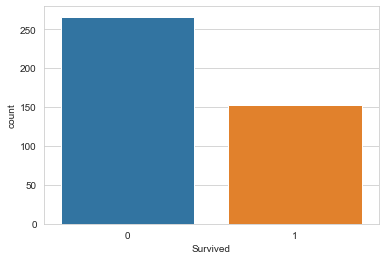

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

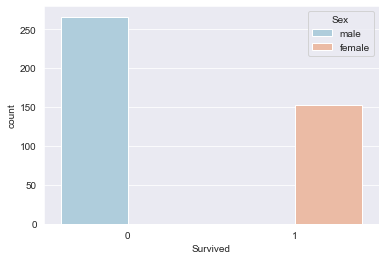

In [23]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

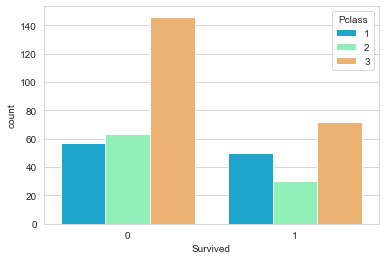

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

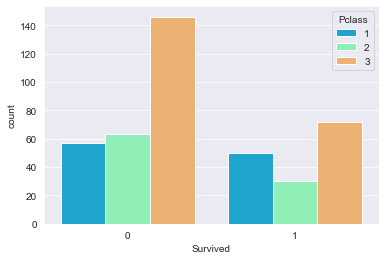

In [25]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

# Data Imbalance?

In [44]:
# sns.countplot('Embarked', data=df, palette=['blue','green'])

In [27]:
df['Embarked'].value_counts(normalize=True)

S    0.645933
C    0.244019
Q    0.110048
Name: Embarked, dtype: float64

In [28]:
df['Age'].isnull().sum()

86

# Outliers Detection

Outliers are extreme values that differ from most other data points in a dataset. They can have a big impact on your statistical analyses and skew the results of any hypothesis tests.

It’s important to carefully identify potential outliers in your dataset and deal with them in an appropriate manner for accurate results.

C:\Users\Fatima Shaheen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

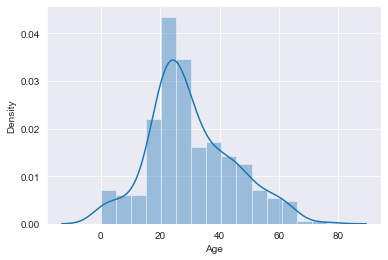

In [29]:
sns.distplot(df['Age'].dropna())

C:\Users\Fatima Shaheen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

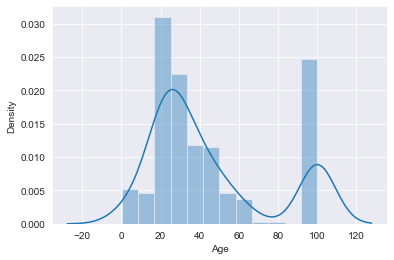

In [30]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of passenger')

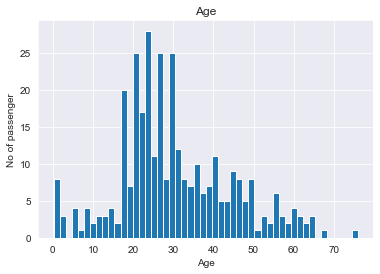

In [31]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

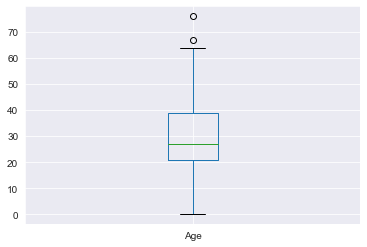

In [32]:
figure=df.boxplot(column="Age")

In [33]:
df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [34]:
uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-12.271037345427477
72.81621806831905
30.272590361445783


(None, None, None)

Text(0, 0.5, 'No of passenger')

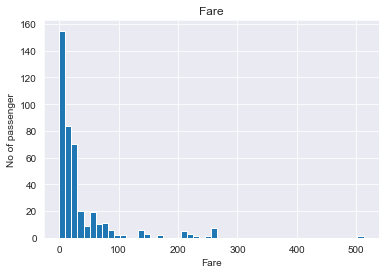

In [35]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

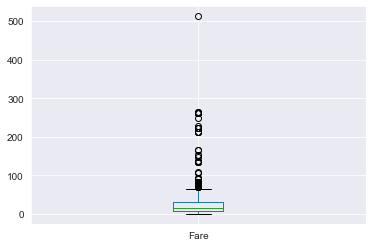

In [36]:
df.boxplot(column="Fare")

In [37]:
df['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [38]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [39]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-27.5105
66.9063


(None, None)

In [40]:
data=df.copy()

# Splitting the Model

# For splitting of data into train and test set

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Age','Fare']].fillna(0),df['Survived'],test_size=0.3)

# Logistic Regression

In [43]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression


classifier=LogisticRegression()
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.5873015873015873
roc_auc_score: 0.5705882352941176
